In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

def time_to_seconds(time_str):
    # 시간 문자열을 ':' 기준으로 분리
    parts = time_str.split(':')
    
    # 시, 분, 초, 밀리초로 분리
    hours = int(parts[0])
    minutes = int(parts[1])
    seconds = int(parts[2])
    milliseconds = int(parts[3]) if len(parts) > 3 else 0
    
    # 초로 변환
    total_seconds = hours * 3600 + minutes * 60 + seconds + milliseconds / 1000
    
    return total_seconds

def plot_sm_result(pred_csv_path, gt_csv_path, title, gt_header_uppercase=True):
    df_pred = pd.read_csv(pred_csv_path, delimiter='\t', header=None, names=['start_second', 'end_second', 'music_or_speech'])
    df_gt = pd.read_csv(gt_csv_path)

    total_duration = df_pred['end_second'].max()

    fig, ax = plt.subplots(figsize=(15, 4))
    plt.ylim(-0.5, 2.5)
    plt.xlabel('Time(sec)')
    plt.yticks([0, 1, 2], ['Speech', 'Music', 'Ground Truth'])
    plt.title(title)

    gt_color = '#FF9999'  # 연한 빨강
    music_color = '#6699CC'  # 파스텔 파랑
    speech_color = '#99CC99'  # 파스텔 초록

    # Ground Truth 음악 구간 시각화
    for _, row in df_gt.iterrows():
        if gt_header_uppercase:
            start = time_to_seconds(row['Start']) if ':' in row['Start'] else row['Start']
            end = time_to_seconds(row['End']) if ':' in row['End'] else row['End']
        else:
            start = row['start']
            end = row['end']

        ax.axhspan(1.5, 2.5, xmin=start/total_duration, xmax=end/total_duration, facecolor=gt_color, alpha=0.8)

    # 예측된 음악과 음성 구간 시각화
    for _, row in df_pred.iterrows():
        start = row['start_second']
        end = row['end_second']
        if row['music_or_speech'] == 'm':
            ax.axhspan(0.5, 1.5, xmin=start/total_duration, xmax=end/total_duration, facecolor=music_color, alpha=0.8)
        elif row['music_or_speech'] == 's':
            ax.axhspan(-0.5, 0.5, xmin=start/total_duration, xmax=end/total_duration, facecolor=speech_color, alpha=0.8)

    # 구분선 추가
    ax.axhline(y=0.5, color='black', linestyle='-', linewidth=0.5)
    ax.axhline(y=1.5, color='black', linestyle='-', linewidth=0.5)

    # x축 설정
    ax.set_xlim(0, total_duration)
    x_ticks = range(0, int(total_duration) + 1, 20)  # 1분 간격으로 눈금 설정
    ax.set_xticks(x_ticks)

    # x축 레이블 포맷 설정
    def format_time(x, pos):
        return str(timedelta(seconds=int(x)))[2:7]  # mm:ss 형식으로 변환

    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time))

    # x축 레이블 회전
    plt.xticks(rotation=90)

    # 범례 추가
    ax.axhspan(0, 0, facecolor=gt_color, alpha=0.8, label='Ground Truth: Music')
    ax.axhspan(0, 0, facecolor=music_color, alpha=0.8, label='Prediction: Music')
    ax.axhspan(0, 0, facecolor=speech_color, alpha=0.8, label='Prediction: Speech')
    plt.legend(loc='upper right')

    # 그래프 표시
    plt.tight_layout()
    plt.show()
        

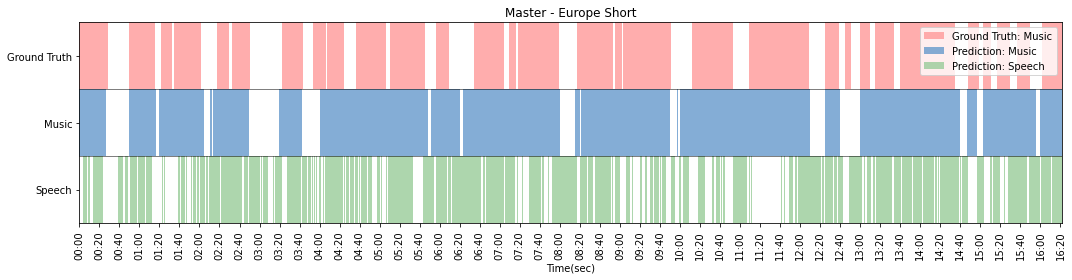

In [4]:
pred_csv_path = './Europe_Short.csv'
gt_csv_path = '../../TC_detection/test_samples/Europe_Short_GT.csv'

title = "Master - Europe Short"
plot_sm_result(pred_csv_path, gt_csv_path, title, gt_header_uppercase=False)


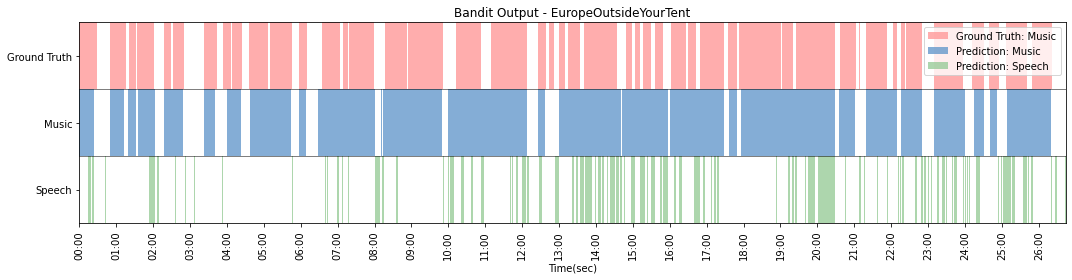

In [12]:
pred_csv_path = './EuropeOutsideYourTent_s01e01_music.csv'
gt_csv_path = '/home/gaudio/kaya/GSP/mtt/K_testing/tc_detection_eval/EuropeOutsideYourTent_s01e01_true_CS_converted.csv'
title = "Bandit Output - EuropeOutsideYourTent"
plot_sm_result(pred_csv_path, gt_csv_path, title, gt_header_uppercase=False)

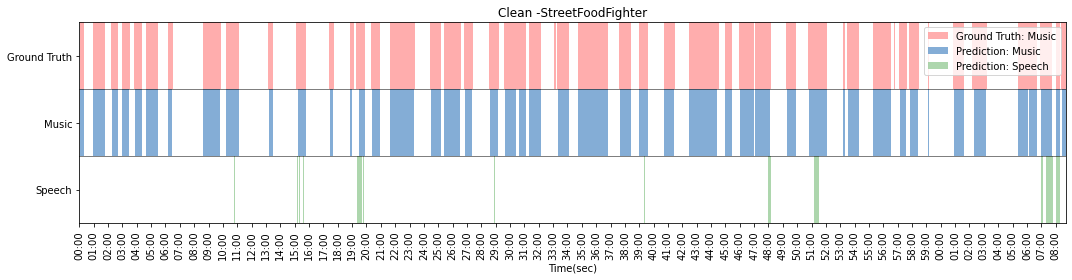

In [13]:
pred_csv_path = './StreetFoodFighter_s01e04_Music_1ch.csv'
gt_csv_path = '../../test_samples/tc_test_samples/StreetFoodFighter_s01e04_regions.csv'
title = "Clean - StreetFoodFighter"
plot_sm_result(pred_csv_path, gt_csv_path, title)